# First contact with SageMath

This Jupyter notebook illustrates a few elementary features of [SageMath](https://www.sagemath.org/).

First we set up the display to have LaTeX-typset outputs:

In [1]:
%display latex

## Starting with numbers...

SageMath knows about $\pi$, $e$ and $i$ (well, it's mathematical software, isn't it ?):

In [2]:
e^(i*pi) + 1

0

*--- It's nice, but I thought SageMath was based on Python: shouldn't the above be written* `e**(i*pi) + 1`, 
*given that* `^` *is the bitwise XOR operator in Python?*

Actually, the input cells are **preparsed** by SageMath before being sent to the Python interpreter. The action of the preparser is revealed by the function `preparse`:

In [3]:
preparse("e^(i*pi) + 1")

'e**(i*pi) + Integer(1)'

We see that indeed, the character `^` has been changed to `**`.

Another noticable change is `1` $\to$ `Integer(1)`. This means that the preparser is turning integers into SageMath integers, which belong to the class `Integer`:

In [4]:
type(1)

<class 'sage.rings.integer.Integer'>

This type of integer is much more sophisticated than a mere Python integer (`int`). In particular, it knows to which mathematical set it belongs. The latter is returned by the function `parent`:

In [5]:
parent(1)

Integer Ring

To have more information than just the symbol of the parent, one can use the `print` function:

In [6]:
print(parent(1))

Integer Ring


Let us denote this object by the Python variable `Z`:

In [7]:
Z = parent(1)
Z

Integer Ring

`Z` is endowed with many methods, which can be discovered via the **TAB key**:
```
    Z.<TAB>
```
Once a method has been selected, one can get some **documentation** about it via `?`:

In [8]:
Z.cardinality?

Signature:      Z.cardinality()
Docstring:     
   Count the elements of the enumerated set.

   EXAMPLES:

      sage: NN = InfiniteEnumeratedSets().example()
      sage: NN.cardinality()
      +Infinity
Init docstring: Initialize self.  See help(type(self)) for accurate signature.
File:           ~/sage/10.6/src/sage/categories/sets_cat.py
Type:           method

A double question mark leads directly to the **source code** (recall that SageMath is free software!):

In [9]:
Z.cardinality??

Signature: Z.cardinality()
Docstring:
   Count the elements of the enumerated set.

   EXAMPLES:

      sage: NN = InfiniteEnumeratedSets().example()
      sage: NN.cardinality()
      +Infinity
Source:   
            def cardinality(self):
                """
                Count the elements of the enumerated set.

                EXAMPLES::

                    sage: NN = InfiniteEnumeratedSets().example()
                    sage: NN.cardinality()
                    +Infinity
                """
                from sage.rings.infinity import infinity
                return infinity
File:      ~/sage/10.6/src/sage/categories/sets_cat.py
Type:      method

More documentation is available in the [reference manual](https://doc.sagemath.org/html/en/reference/) as well as in various [tutorials and guides](https://doc.sagemath.org/html/en/).

In [10]:
Z.cardinality()

+Infinity

Other methods:

In [11]:
Z.is_ring()

True

In [12]:
Z.is_field()

False

In [13]:
Z.zero(), Z.one()  # the ring zero and unit elements

(0, 1)

Expressing $1\in \mathbb{Z}$ in SageMath:

In [14]:
1 in Z

True

1 is actually the unit element of the ring $\mathbb{Z}$:

In [15]:
1 == Z.one()

True

Note that there exits a predefined variable, `ZZ`, for $\mathbb{Z}$:

In [16]:
Z is ZZ

True

SageMath integers can be arbitrarily large (up to the limit of the computer memory!):

In [17]:
m = 2^127 - 1
m

170141183460469231731687303715884105727

In [18]:
m.is_prime()

True

Note that one has still access to the Python integers, via `int`:

In [19]:
int(1)

1

In [20]:
type(_)  # the underscore stands for the latest output

<class 'int'>

An alternative for accessing Python integers is to use the suffix `r` (standing for "raw", i.e. unpreparsed):

In [21]:
1r

1

In [22]:
type(_)

<class 'int'>

The Python integers are automatically converted (coerced) into SageMath integers if necessary, for instance if they are
added to some SageMath integer:

In [23]:
int(1) + 2

3

In [24]:
type(_)

<class 'sage.rings.integer.Integer'>

Of course, SageMath also knows about **rational numbers**:

In [25]:
2/3

2/3

Python would have returned 0.6666666666666666. This is not the case here because

In [26]:
preparse('2/3')

'Integer(2)/Integer(3)'

and the division of the (Sage) integer 2 by the (Sage) integer 3 is the (Sage) rational number $2/3$: 

In [27]:
parent(2/3)

Rational Field

In [28]:
print(_)

Rational Field


As the above examples illustrate, SageMath is based on a **Parent/Element scheme**: `parent(a)` is the algebraic or topological/differential structure to which `a` belongs. 

SageMath has also the concept of **mathematical categories**:

In [29]:
print(category(Z))

Join of Category of Dedekind domains and Category of euclidean domains and Category of noetherian rings and Category of infinite enumerated sets and Category of metric spaces


### Real numbers

SageMath can compute numerical values with an arbitrary number of digits:

In [30]:
n(pi, digits=1000)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405132000568127145263560827785771342757789609173637178721468440901224953430146549585371050792279689258923542019956112129021960864034418159813629774771309960518707211349999998372978049951059731732816096318595024459455346908302642522308253344685035261931188171010003137838752886587533208381420617177669147303598253490428755468731159562863882353787593751957781857780532171226806613001927876611195909216420199

`n` is the shortcut alias for `numerical_approx`.

Another interesting computation regards the *Hermite-Ramanujan constant*:

In [31]:
a = exp(pi*sqrt(163))
a

e^(sqrt(163)*pi)

Actually, this number is very close to an integer, as announced by [Charles Hermite in 1859](https://gallica.bnf.fr/ark:/12148/bpt6k6209489m/f60) (probably without using SageMath...):

In [32]:
n(a, digits=50)

2.6253741264076874399999999999925007259719818568889e17

That's clear if we turn off scientific notation:

In [33]:
n(a, digits=50).str(no_sci=2)

'262537412640768743.99999999999925007259719818568888661'

## Symbolic computations

Beside numerical computations, SageMath can perform symbolic ones. For instance, it can compute a **derivative**:

In [34]:
f = diff(sin(x^2), x)
f

2*x*cos(x^2)

Due to the command `%display latex` in the first cell of this notebook, SageMath displays all results, such as the one above, in LaTeX format. To get them in console mode, use the function `print`:

In [35]:
print(f)

2*x*cos(x^2)


The explicit LaTeX code can be obtained:

In [36]:
print(latex(f))

2 \, x \cos\left(x^{2}\right)


A pdf file with the LaTeX typeset formula is generated by the function `view`:

In [37]:
view(f)

The symbolic variable `x` used above is the only one that is predefined in a SageMath session. All other symbolic variables must be declared explicitly, via the function `var`:

In [38]:
y = var('y')

alp = var('alp', latex_name=r'\alpha')

In [39]:
f = alp*y + x
f

alp*y + x

In [40]:
diff(f, alp)

y

SageMath can also compute **primitives**:

In [41]:
integrate(x^5/(x^3 - 2*x +1), x, hold=True) 

integrate(x^5/(x^3 - 2*x + 1), x)

In [42]:
integrate(x^5/(x^3 - 2*x + 1), x) 

1/3*x^3 + 2/5*sqrt(5)*log((2*x - sqrt(5) + 1)/(2*x + sqrt(5) + 1)) + 2*x - log(x^2 + x - 1) + log(x - 1)

and of course definite integrals: it suffices to provide the two boundaries after the argument `x`. A first attempt with 0 and 1 fails:

In [43]:
# integrate(x^5/(x^3 - 2*x + 1), x, 0, 1)

**Don't panic:** error messages are usually long because they display the whole call stack. The important information lies at the end:
```
ValueError: Integral is divergent
```

Choosing the boundaries to be 2 and 3 yields a convergent integral:

In [44]:
integrate(x^5/(x^3 - 2*x + 1), x, 2, 3)

2/5*sqrt(5)*log(-7/22*sqrt(5) + 27/22) - 2/5*sqrt(5)*log(-1/2*sqrt(5) + 3/2) - log(11) + log(5) + log(2) + 25/3

In [45]:
n(_)  # numerical approximation of the above result

8.50669189170048

SageMath proposes various symbolic engines to evaluate a primitive. The default one is [Maxima](https://maxima.sourceforge.io/):

In [46]:
integrate(x^5/(x^3 - 2*x + 1), x, algorithm='maxima')  # same result as above

1/3*x^3 + 2/5*sqrt(5)*log((2*x - sqrt(5) + 1)/(2*x + sqrt(5) + 1)) + 2*x - log(x^2 + x - 1) + log(x - 1)

but [SymPy](https://www.sympy.org) is also available:

In [47]:
integrate(x^5/(x^3 - 2*x + 1), x, algorithm='sympy')

1/3*x^3 - 1/5*(2*sqrt(5) + 5)*log(1/80*(2*sqrt(5) + 5)^2 + x + 1/4*sqrt(5) - 1/16) + 1/5*(2*sqrt(5) - 5)*log(1/80*(2*sqrt(5) - 5)^2 + x - 1/4*sqrt(5) - 1/16) + 2*x + log(x - 1)

as well as [Giac](https://www-fourier.ujf-grenoble.fr/~parisse/giac.html): 

In [48]:
integrate(x^5/(x^3-2*x+1), x, algorithm='giac')

1/3*x^3 + 2/5*sqrt(5)*log(abs((2*x - sqrt(5) + 1)/(2*x + sqrt(5) + 1))) + 2*x - log(abs(x^2 + x - 1)) + log(abs(x - 1))

One can even use [WolframAlpha](https://www.wolframalpha.com/calculators/integral-calculator/) via some internet connection:

In [49]:
integrate(x^5/(x^3-2*x+1), x, algorithm='mathematica_free')

1/3*x^3 - 1/5*(2*sqrt(5) + 5)*log(2*x + sqrt(5) + 1) + 1/5*(2*sqrt(5) - 5)*log(-2*x + sqrt(5) - 1) + 2*x + log(-x + 1)

Actually SageMath has some interface to Mathematica:

In [50]:
cos(x^2)._mathematica_init_()

'Cos[(x)^(2)]'

as well as to SymPy, Maxima and Giac:

In [51]:
cos(x^2)._sympy_()

cos(x**2)

In [52]:
print(cos(x^2)._maxima_())

                                              2
                               cos(_SAGE_VAR_x )


In [53]:
cos(x^2)._giac_()

cos(sageVARx^2)

Let us check the primitive computation:

In [54]:
f = integrate(x^5/(x^3-2*x+1), x) 
f

1/3*x^3 + 2/5*sqrt(5)*log((2*x - sqrt(5) + 1)/(2*x + sqrt(5) + 1)) + 2*x - log(x^2 + x - 1) + log(x - 1)

In [55]:
diff(f, x)

x^2 + 4/5*sqrt(5)*(2*x + sqrt(5) + 1)*(1/(2*x + sqrt(5) + 1) - (2*x - sqrt(5) + 1)/(2*x + sqrt(5) + 1)^2)/(2*x - sqrt(5) + 1) - (2*x + 1)/(x^2 + x - 1) + 1/(x - 1) + 2

In [56]:
_.simplify_full()

x^5/(x^3 - 2*x + 1)

Indefinite integrals can also be computed:

In [57]:
integrate(exp(-x^2), x, -oo, +oo)

sqrt(pi)

### Other examples of symbolic computations: 

- Taylor expansions:

In [58]:
exp(x).taylor(x, 0, 8)

1/40320*x^8 + 1/5040*x^7 + 1/720*x^6 + 1/120*x^5 + 1/24*x^4 + 1/6*x^3 + 1/2*x^2 + x + 1

- limits:

In [59]:
lim(sin(x)/x, x=0)

1

- series: Riemann's zeta function $\zeta(s)$ for $s=2$ and $s=3$ (Apéry's constant):

In [60]:
n = var('n')  # declaring n as a symbolic variable
sum(1/n^2, n, 1, +oo, hold=True) == sum(1/n^2, n, 1, +oo)

sum(n^(-2), n, 1, +Infinity) == 1/6*pi^2

In [61]:
sum(1/n^3, n, 1, +oo)

zeta(3)

In [62]:
numerical_approx(_)

1.20205690315959

Of course, as many standard functions, Riemann's zeta function is already implemented in SageMath:

In [63]:
zeta(2)

1/6*pi^2

- Solving an equation:

In [64]:
solve(x^2 == x + 1, x)

[x == -1/2*sqrt(5) + 1/2, x == 1/2*sqrt(5) + 1/2]

- Solving a differential equation:

In [65]:
y = function('y')
eq = diff(y(x), x) - y(x) == x*y(x)^4
eq

-y(x) + diff(y(x), x) == x*y(x)^4

In [66]:
desolve(eq, y(x))

e^x/(-1/3*(3*x - 1)*e^(3*x) + _C)^(1/3)

## The power of Python

Finally, to illustrate the advantage of being built atop of Python, here is a loop for displaying Pascal's triangle with only two instruction lines:

In [67]:
for n in range(10): 
    print([binomial(n, p) for p in range(n+1)])

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


## Next step:

### Plots and functions in SageMath

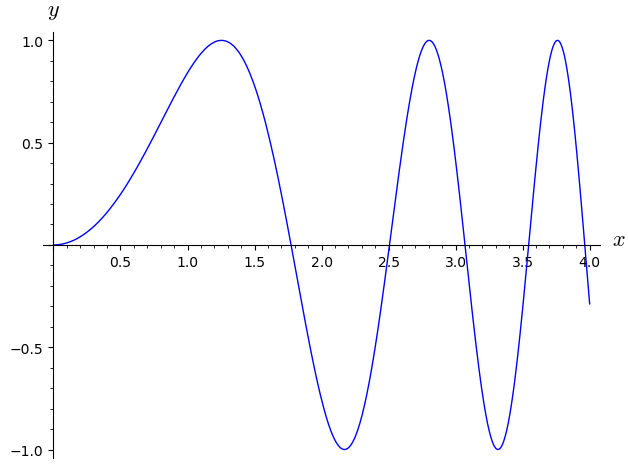

In [68]:
plot(sin(x^2), (x, 0, 4), axes_labels=['$x$', '$y$'])

See the [dedicated notebook](https://nbviewer.org/github/egourgoulhon/SageMathTour/blob/master/Notebooks/plot_tour_2D.ipynb) for more on plots in SageMath. 